In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/sellers.csv')

In [ ]:
df2= pd.read_csv('/content/drive/MyDrive/products.csv')

In [ ]:
df3= pd.read_csv('/content/drive/MyDrive/payments - payments.csv')

In [ ]:
df4= pd.read_csv('/content/drive/MyDrive/orders.csv')

In [ ]:
df5= pd.read_csv('/content/drive/MyDrive/order_items.csv')

In [ ]:
df6= pd.read_csv('/content/drive/MyDrive/geolocation1.csv')

In [ ]:
df7= pd.read_csv('/content/drive/MyDrive/customers.csv')

In [ ]:
df7.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
df5.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
df5.dtypes

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,datetime64[ns]
price,float64
freight_value,float64


In [ ]:
df4['order_purchase_timestamp'] = pd.to_datetime(df4['order_purchase_timestamp'])

In [ ]:
df4['order_approved_at'] = pd.to_datetime(df4['order_approved_at'], errors='coerce')

In [ ]:
df4['order_delivered_carrier_date'] = pd.to_datetime(df4['order_delivered_carrier_date'], errors='coerce')

In [ ]:
df4['order_delivered_customer_date'] = pd.to_datetime(df4['order_delivered_customer_date'], errors='coerce')

In [ ]:
df4['order_estimated_delivery_date'] = pd.to_datetime(df4['order_estimated_delivery_date'], errors='coerce')

In [ ]:
df5['shipping_limit_date'] = pd.to_datetime(df5['shipping_limit_date'], errors='coerce')

**Q1) List All Unique Cities Where Customers Are Located**

In [ ]:
unique_cities = df7['customer_city'].drop_duplicates().sort_values()

#the unique cities
print("Unique cities:")
for city in unique_cities:
    print(city)

Unique cities:
abadia dos dourados
abadiania
abaete
abaetetuba
abaiara
abaira
abare
abatia
abdon batista
abelardo luz
abrantes
abre campo
abreu e lima
acaiaca
acailandia
acajutiba
acarau
acari
acegua
acopiara
acreuna
acu
acucena
adamantina
adhemar de barros
adolfo
adrianopolis
adustina
afogados da ingazeira
afonso claudio
afranio
agisse
agrestina
agrolandia
agronomica
agua boa
agua branca
agua clara
agua comprida
agua doce
agua doce do norte
agua fria de goias
agua limpa
agua nova
agua preta
agua santa
aguai
aguas belas
aguas claras
aguas da prata
aguas de lindoia
aguas de santa barbara
aguas de sao pedro
aguas formosas
aguas frias
aguas lindas de goias
aguas mornas
aguas vermelhas
agudo
agudos
aguia branca
aimores
aiuaba
aiuruoca
ajapi
ajuricaba
alagoa
alagoa grande
alagoa nova
alagoinha
alagoinhas
alambari
alcantara
alcinopolis
alcobaca
alegre
alegrete
alegrete do piaui
alegria
alem paraiba
alexandra
alexandria
alexandrita
alexania
alfenas
alfredo chaves
alfredo marcondes
alfredo vas

**Q2) Count The Number Of Orders Placed in 2017**

In [ ]:
# orders placed in 2017
orders_2017 = df4[df4['order_purchase_timestamp'].dt.year == 2017]

order_count_2017 = orders_2017.shape[0]
print(f"Orders placed in 2017: {order_count_2017}")

Orders placed in 2017: 45101


**Q3) Find The Total Sales Per Category**

In [ ]:
merged_order_items = pd.merge(df4, df5, on='order_id')
merged_order_items = pd.merge(merged_order_items, df2, on='product_id')
merged_order_items['total_sales'] = merged_order_items['price'] + merged_order_items['freight_value']

# Total sales per category
total_sales_per_category = merged_order_items.groupby('product category')['total_sales'].sum().reset_index()
total_sales_per_category = total_sales_per_category.sort_values(by='total_sales', ascending=True)

# Print the result
print(f"Total sales per category (including price and freight): \n{total_sales_per_category}")

Total sales per category (including price and freight): 
               product category  total_sales
63       insurance and services       324.51
18  Fashion Children's Clothing       665.36
51               cds music dvds       954.99
32              House Comfort 2      1170.58
59                      flowers      1598.91
..                          ...          ...
54         computer accessories   1059272.40
69                sport leisure   1156656.48
50               bed table bath   1241681.72
46              Watches present   1305541.61
30                HEALTH BEAUTY   1441248.07

[74 rows x 2 columns]


**Q4) Calculate The Percentage Of Orders That Were Paid In Installments**

In [ ]:
merged_payments = pd.merge(df3, df5[['order_id', 'product_id']], on='order_id')
merged_data = pd.merge(merged_payments, df2[['product_id', 'product category']], on='product_id')

# Aggregating sales data
category_sales = merged_data.groupby('product category').agg(
    total_orders=('order_id', 'count'),
    installments_orders=('payment_installments', lambda x: (x > 1).sum())
).reset_index()
category_sales['percentage_installment'] = (category_sales['installments_orders'] / category_sales['total_orders']) * 100

category_sales = category_sales.sort_values(by='percentage_installment', ascending=True)

# Print the result
print(category_sales[['product category', 'percentage_installment']])

               product category  percentage_installment
63       insurance and services                0.000000
59                      flowers                9.090909
56                  electronics               20.632689
2               Arts and Crafts               20.833333
32              House Comfort 2               22.580645
..                          ...                     ...
46              Watches present               64.699242
31  HOUSE PASTALS OVEN AND CAFE               65.384615
5    CITTE AND UPHACK FURNITURE               65.853659
39                   La Cuisine               68.750000
42                          PCs               75.000000

[74 rows x 2 columns]


**Q5) Count The Number Of Customers From Each State**

In [ ]:
customers_by_state = df7.groupby('customer_state').size().reset_index(name='customer_count')

customers_by_state = customers_by_state.sort_values(by='customer_count', ascending=True)

# Print the result
print(f"Customers by state (sorted by customer count): \n{customers_by_state}")

Customers by state (sorted by customer count): 
   customer_state  customer_count
21             RR              46
3              AP              68
0              AC              81
2              AM             148
20             RO             253
26             TO             280
24             SE             350
1              AL             413
19             RN             485
16             PI             495
14             PB             536
11             MS             715
9              MA             747
12             MT             907
13             PA             975
5              CE            1336
15             PE            1652
8              GO            2020
7              ES            2033
6              DF            2140
4              BA            3380
23             SC            3637
17             PR            5045
22             RS            5466
10             MG           11635
18             RJ           12852
25             SP           41746


**1)Calculate The number Of Orders Per Month In 2018.**

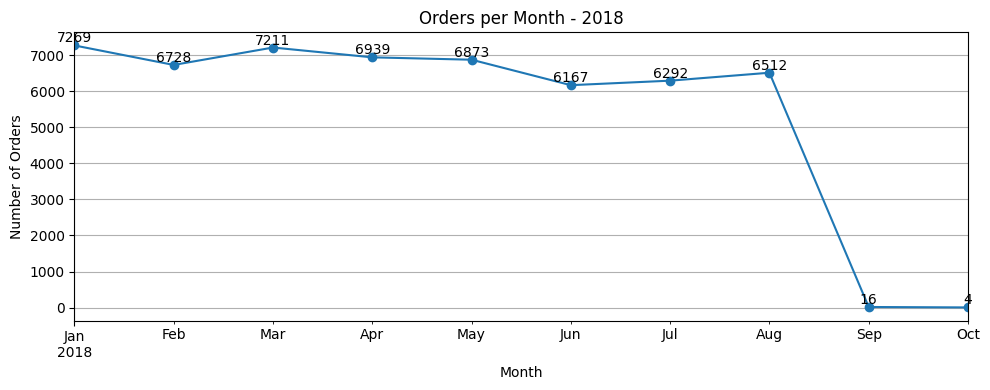

In [ ]:
# Filters 2018 orders
orders_2018 = df4[df4['order_purchase_timestamp'].dt.year == 2018]
monthly = orders_2018['order_purchase_timestamp'].dt.to_period('M').value_counts().sort_index()

#line chart
monthly.sort_index().plot(kind='line', marker='o', figsize=(10, 4), title='Orders per Month - 2018')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
for x, y in zip(monthly.index, monthly.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.show()

**2)Find Average Number Of Products Per Order, Grouped By Customer City.**

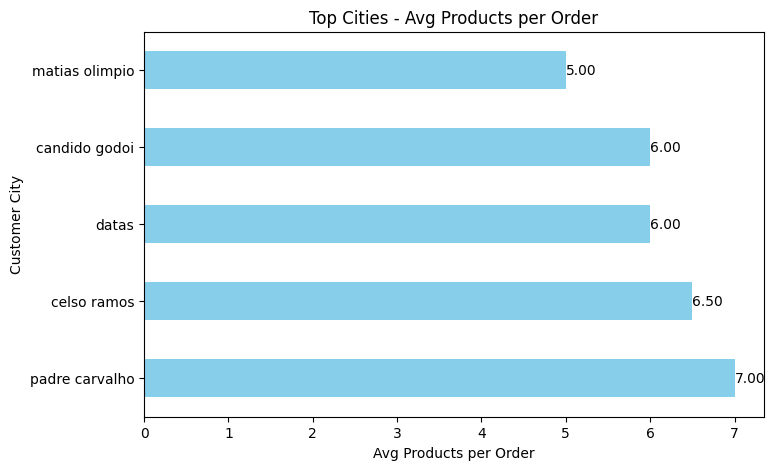

In [ ]:
merged = df4.merge(df5, on='order_id').merge(df7, on='customer_id')
order_counts = merged.groupby('order_id')['order_item_id'].count().reset_index(name='order_item_count')
order_city = df4.merge(df7[['customer_id', 'customer_city']], on='customer_id')
order_city = order_city.merge(order_counts, on='order_id')
avg_items = order_city.groupby('customer_city')['order_item_count'].mean().round(2)
avg_items = avg_items.sort_values(ascending=False)

avg_items = avg_items.head(5)

avg_items.plot(kind='barh', color='skyblue', figsize=(8,5))
plt.title('Top Cities - Avg Products per Order')
plt.xlabel('Avg Products per Order')
plt.ylabel('Customer City')

for index, value in enumerate(avg_items):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()

**3)Calculate The Percentage Of Total Revenue Contributed By Each Product Category**

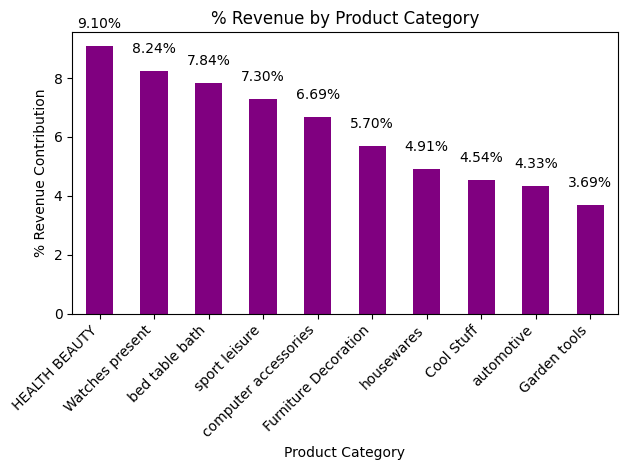

In [ ]:
category_sales = pd.merge(df5, df2[['product_id', 'product category']], on='product_id') \
    .groupby('product category').agg(total_sales=('price', 'sum'), total_freight=('freight_value', 'sum')) \
    .assign(total_sales=lambda x: x['total_sales'] + x['total_freight'])

category_sales['percent_contribution'] = (category_sales['total_sales'] / category_sales['total_sales'].sum()) * 100
category_sales = category_sales.sort_values('percent_contribution', ascending=False).head(10)

# Plotting
ax = category_sales['percent_contribution'].plot(kind='bar', color='purple', title='% Revenue by Product Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('% Revenue Contribution')
ax.set_xticklabels(category_sales.index, rotation=45, ha='right')

# Adding labels
for i, v in enumerate(category_sales['percent_contribution']):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**4)Identify The Correlation Between Product Price And Number Of Times A Product Has Been Purchased**

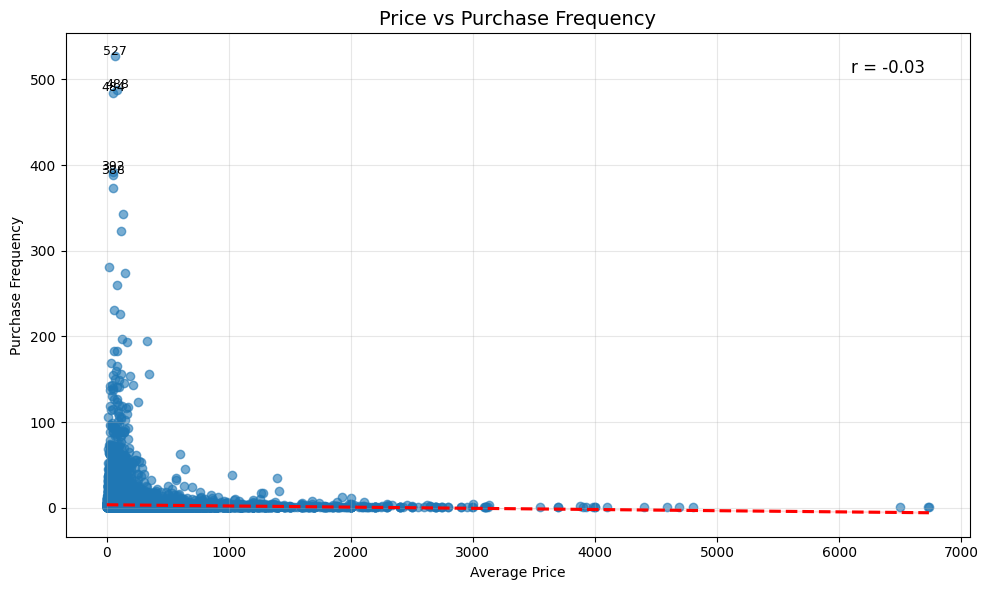

In [ ]:
df = df5.groupby('product_id').agg(avg_price=('price', 'mean'),
                                   count_of_purchase=('order_id', 'count')).reset_index()
# Correlation value
r = df['avg_price'].corr(df['count_of_purchase'])

# Plot
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='avg_price', y='count_of_purchase',
            scatter_kws={'alpha':0.6}, line_kws={'color':'red','linestyle':'--'})

plt.title('Price vs Purchase Frequency', fontsize=14)
plt.xlabel('Average Price')
plt.ylabel('Purchase Frequency')
plt.text(0.95, 0.95, f'r = {r:.2f}', transform=plt.gca().transAxes,
         ha='right', va='top', fontsize=12, color='black')

top_points = df.sort_values('count_of_purchase', ascending=False).head(5)
for _, row in top_points.iterrows():
    plt.text(row['avg_price'], row['count_of_purchase']+2,
             f"{int(row['count_of_purchase'])}", ha='center', fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Q5) Calculate The Total Revenue Generated By Each Sellers, And Rank Them By Revenue**

<Figure size 1000x600 with 0 Axes>

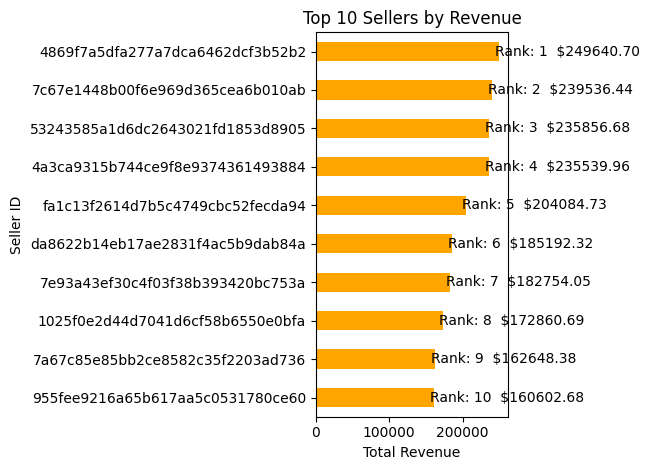

In [ ]:
merged = pd.merge(df5, df1[['seller_id']], on='seller_id')
seller_revenue = merged.groupby('seller_id').agg(
    total_revenue=('price', 'sum'),
    total_freight=('freight_value', 'sum')
).reset_index()

seller_revenue['total_revenue'] += seller_revenue['total_freight']
seller_revenue = seller_revenue.sort_values('total_revenue', ascending=False)
seller_revenue['rank'] = seller_revenue['total_revenue'].rank(ascending=False)

top_10_sellers = seller_revenue.head(10)

plt.figure(figsize=(10,6))
ax = top_10_sellers.plot(kind='barh', x='seller_id', y='total_revenue', color='orange', legend=False)

for i, v in enumerate(top_10_sellers['total_revenue']):
    ax.text(v - 5000, i, f"Rank: {int(top_10_sellers['rank'].iloc[i])}  ${v:.2f}", va='center', fontsize=10, color='black')

plt.title('Top 10 Sellers by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Seller ID')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

**1)Calculate moving average order value for customer over time**

In [ ]:
df_merged = df4.merge(df5, on='order_id')

df_merged['order_value'] = df_merged['price'] + df_merged['freight_value']
df_merged.sort_values(by=['customer_id', 'order_purchase_timestamp'], inplace=True)

# 3-period moving average for each customer's order value
df_merged['moving_avg_order_value'] = df_merged.groupby('customer_id')['order_value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

first_three_avg = df_merged.groupby('customer_id').head(3)
result = first_three_avg[['customer_id', 'moving_avg_order_value']]
print(result)

                             customer_id  moving_avg_order_value
77630   00012a2ce6f8dcda20d059ce98491703                  114.74
11269   000161a058600d5901f007fab4c27140                   67.41
74560   0001fd6190edaaf884bcaf3d49edf079                  195.42
48874   0002414f95344307404f0ace7a26f1d5                  179.35
6612    000379cdec625522490c315e70c7a9fb                  107.01
...                                  ...                     ...
17067   fffecc9f79fd8c764f843e9951b11341                   81.36
107133  fffeda5b6d849fbd39689bb92087f431                   63.13
48956   ffff42319e9b2d713724ae527742af25                  214.13
83649   ffffa3172527f765de70084a7e53aae8                   22.75
83650   ffffa3172527f765de70084a7e53aae8                   22.75

[110756 rows x 2 columns]


**2)Calculate Cumulative Sales Per Month Of Each Year.**

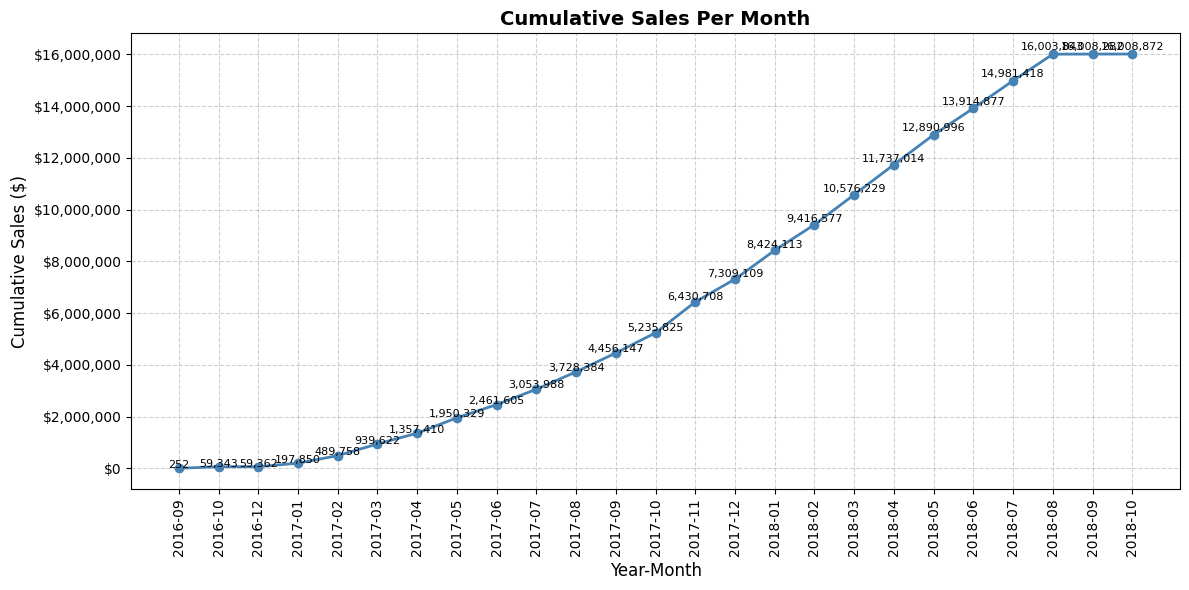

In [ ]:
df_merged = df4.merge(df3, on='order_id')
df_merged['year'] = pd.to_datetime(df_merged['order_purchase_timestamp']).dt.year
df_merged['month'] = pd.to_datetime(df_merged['order_purchase_timestamp']).dt.month
monthly_sales = (
    df_merged.groupby(['year', 'month'], as_index=False)['payment_value']
    .sum()
    .rename(columns={'payment_value': 'sales'})
)
monthly_sales = monthly_sales.sort_values(['year', 'month'])
monthly_sales['cumulative_sales'] = monthly_sales['sales'].cumsum().round(2)
monthly_sales['year_month'] = (
    monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)
)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(monthly_sales['year_month'], monthly_sales['cumulative_sales'], marker='o', color='steelblue', linewidth=2)

ax.set_title('Cumulative Sales Per Month', fontsize=14, fontweight='bold')
ax.set_xlabel('Year-Month', fontsize=12)
ax.set_ylabel('Cumulative Sales ($)', fontsize=12)
plt.xticks(rotation=90)
ax.grid(True, linestyle='--', alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

for i, (ym, val) in enumerate(zip(monthly_sales['year_month'], monthly_sales['cumulative_sales'])):
    ax.text(i, val + (val * 0.01), f'{val:,.0f}', ha='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

**3)Calculate Year_Over_Year growth rate of total sales**

In [ ]:
df_merged = df4.merge(df5, on='order_id')
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
df_merged['total_price'] = df_merged['price'] + df_merged['freight_value']

yearly_sales = df_merged.groupby(df_merged['order_purchase_timestamp'].dt.year)['total_price'].sum()

# Calculate year-over-year growth rate
yoy_growth_rate = yearly_sales.pct_change() * 100
print(yoy_growth_rate)

order_purchase_timestamp
2016             NaN
2017    12390.856022
2018       21.014896
Name: total_price, dtype: float64


**4)Calculate retention rate of customers who has purchased again in 6 months**

In [ ]:
df4['order_purchase_timestamp'] = pd.to_datetime(df4['order_purchase_timestamp'])

# the first purchase date for each customer
first_purchase = df4.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.rename(columns={'order_purchase_timestamp': 'first_purchase_date'}, inplace=True)

df_merged = df4.merge(first_purchase, on='customer_id')

repeat_purchases = df_merged[df_merged['order_purchase_timestamp'] > df_merged['first_purchase_date']].copy()
repeat_purchases['time_since_first_purchase'] = repeat_purchases['order_purchase_timestamp'] - repeat_purchases['first_purchase_date']

retained_customers_df = repeat_purchases[repeat_purchases['time_since_first_purchase'] <= pd.Timedelta(days=180)]
retained_customers = retained_customers_df['customer_id'].unique()

#retention rate
total_customers = df4['customer_id'].nunique()
retained_customer_count = len(retained_customers)
retention_rate = (retained_customer_count / total_customers) * 100

print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 0.00%


**5)Top 3 Customers Who Spent The Most In Each Year.**

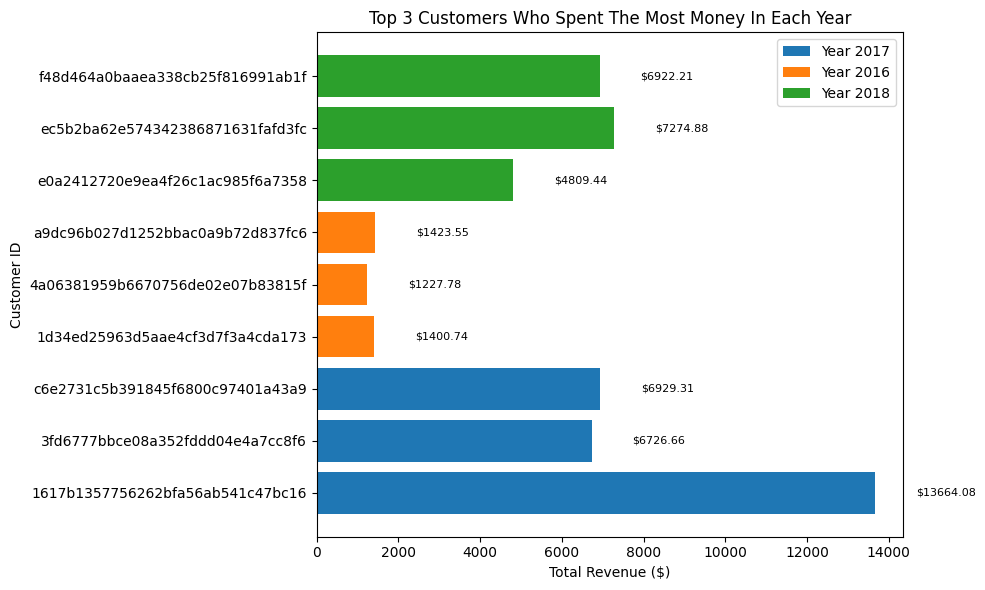

In [ ]:
df_merged = pd.merge(df4, df3, on='order_id')
df_merged['year'] = pd.to_datetime(df_merged['order_purchase_timestamp']).dt.year
yearly_spending = df_merged.groupby(['customer_id', 'year'])['payment_value'].sum().reset_index()
yearly_spending.rename(columns={'payment_value': 'total_spent'}, inplace=True)

yearly_spending['ranking'] = yearly_spending.groupby('year')['total_spent'].rank(method='first', ascending=False)
top_customers = yearly_spending[yearly_spending['ranking'] <= 3]

plt.figure(figsize=(10, 6))

for year in top_customers['year'].unique():
    year_data = top_customers[top_customers['year'] == year]

    bars = plt.barh(year_data['customer_id'], year_data['total_spent'], label=f'Year {year}')

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1000, bar.get_y() + bar.get_height()/2, f"${width:.2f}", ha='left', va='center', fontsize=8)

plt.title('Top 3 Customers Who Spent The Most Money In Each Year')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Customer ID')

plt.legend()
plt.tight_layout()
plt.show()